In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

/home/twig/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df_cells = pd.read_csv("csv/cellmap.csv",    sep = ',')
df_rec   = pd.read_csv("csv/rec_hitmap.csv", sep = ',')
df_sim   = pd.read_csv("csv/sim_hitmap.csv", sep = ',')

In [26]:
# Create base matrix marking cells.
matrix_dims = (df_cells["x"].max()+1, df_cells["y"].max()+1)
matrix_base = np.zeros((matrix_dims[0], matrix_dims[1]))
for idx, row in df_cells.iterrows():
    x, y = row["x"], row["y"]
    
    # Check duplicity.
    if (matrix_base[x][y] > .1):
        print("Error: Duplicate input in cell [%d,%d]" % (x,y))
    matrix_base[x][y] = 200

In [27]:
matrix_dims

(278, 608)

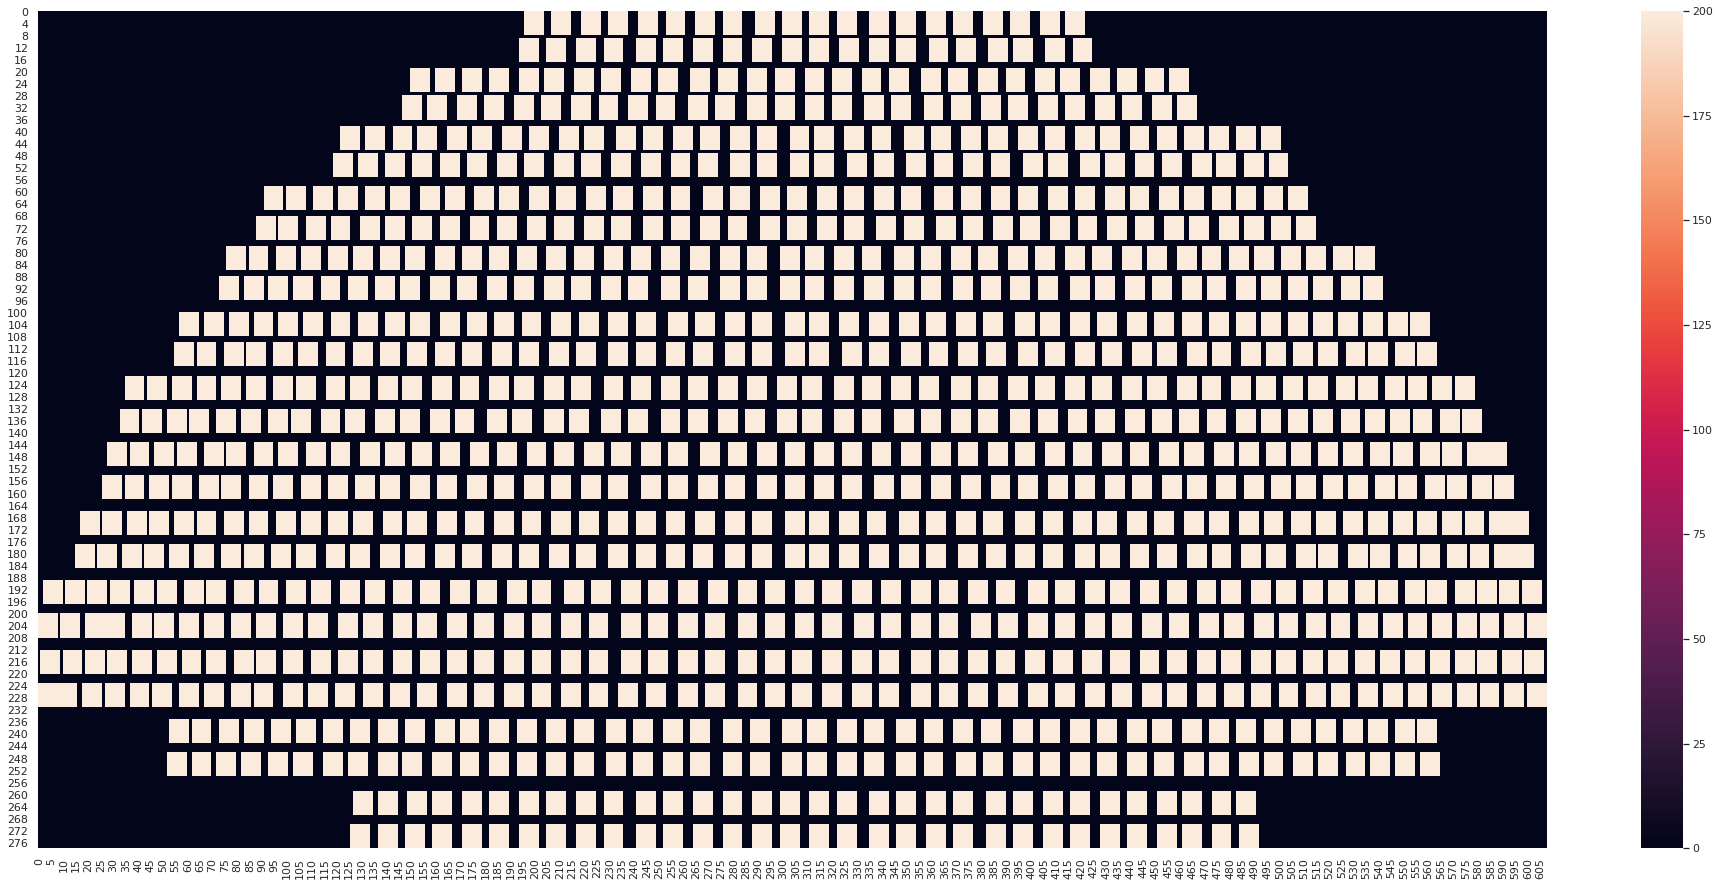

In [20]:
# Plot base matrix.
sns.heatmap(matrix_base)
plt.show()

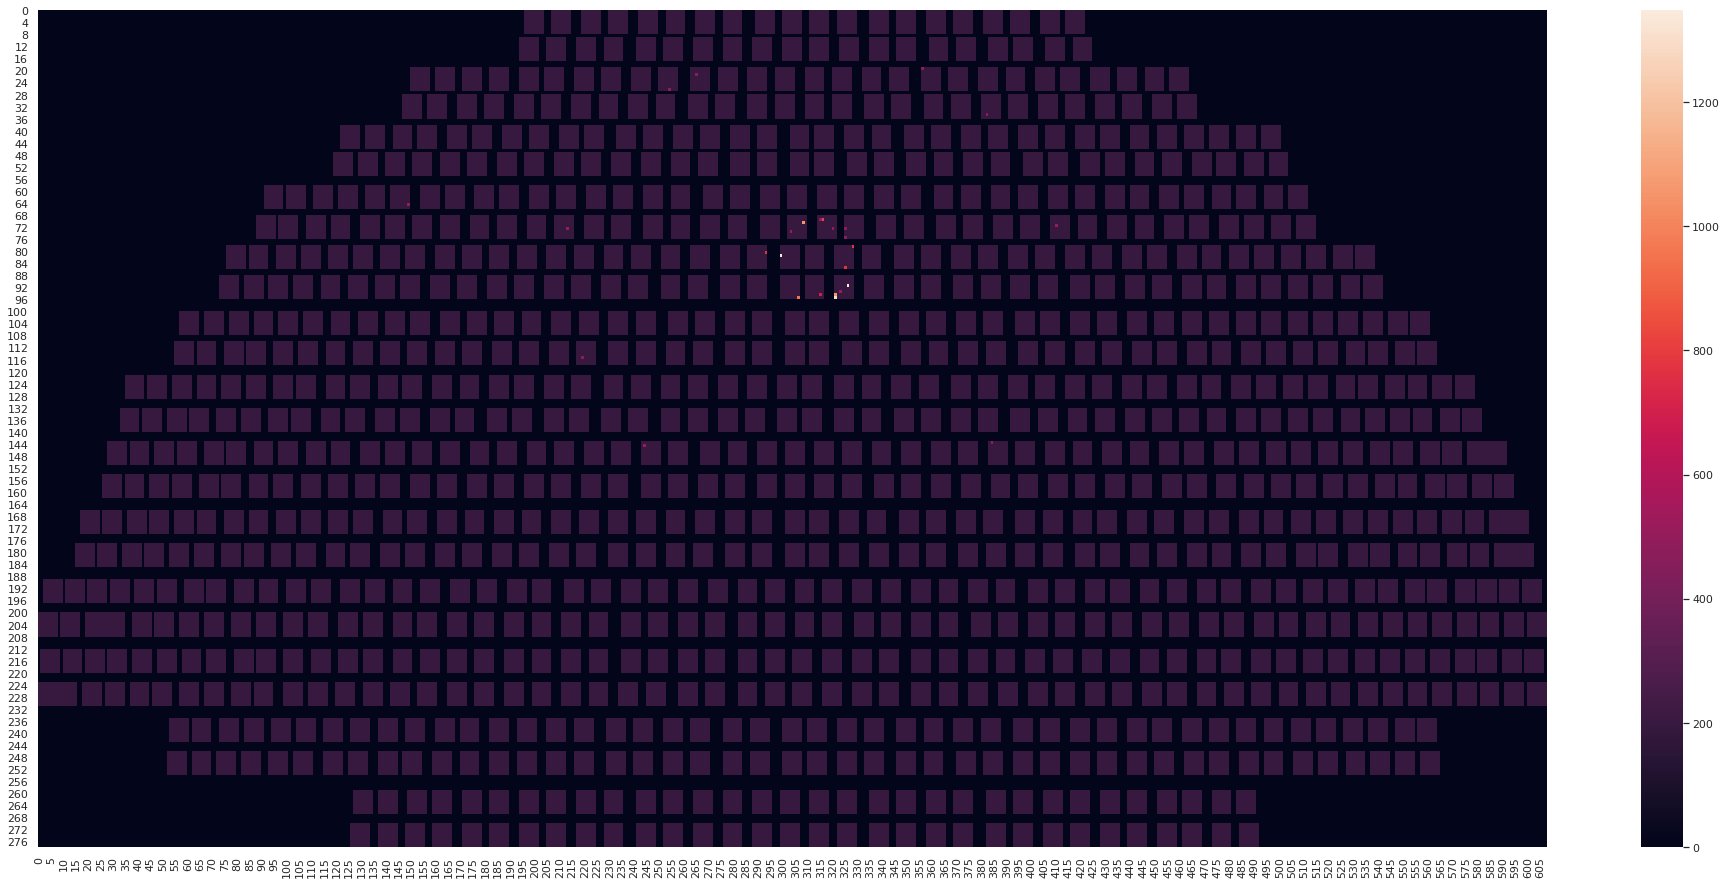

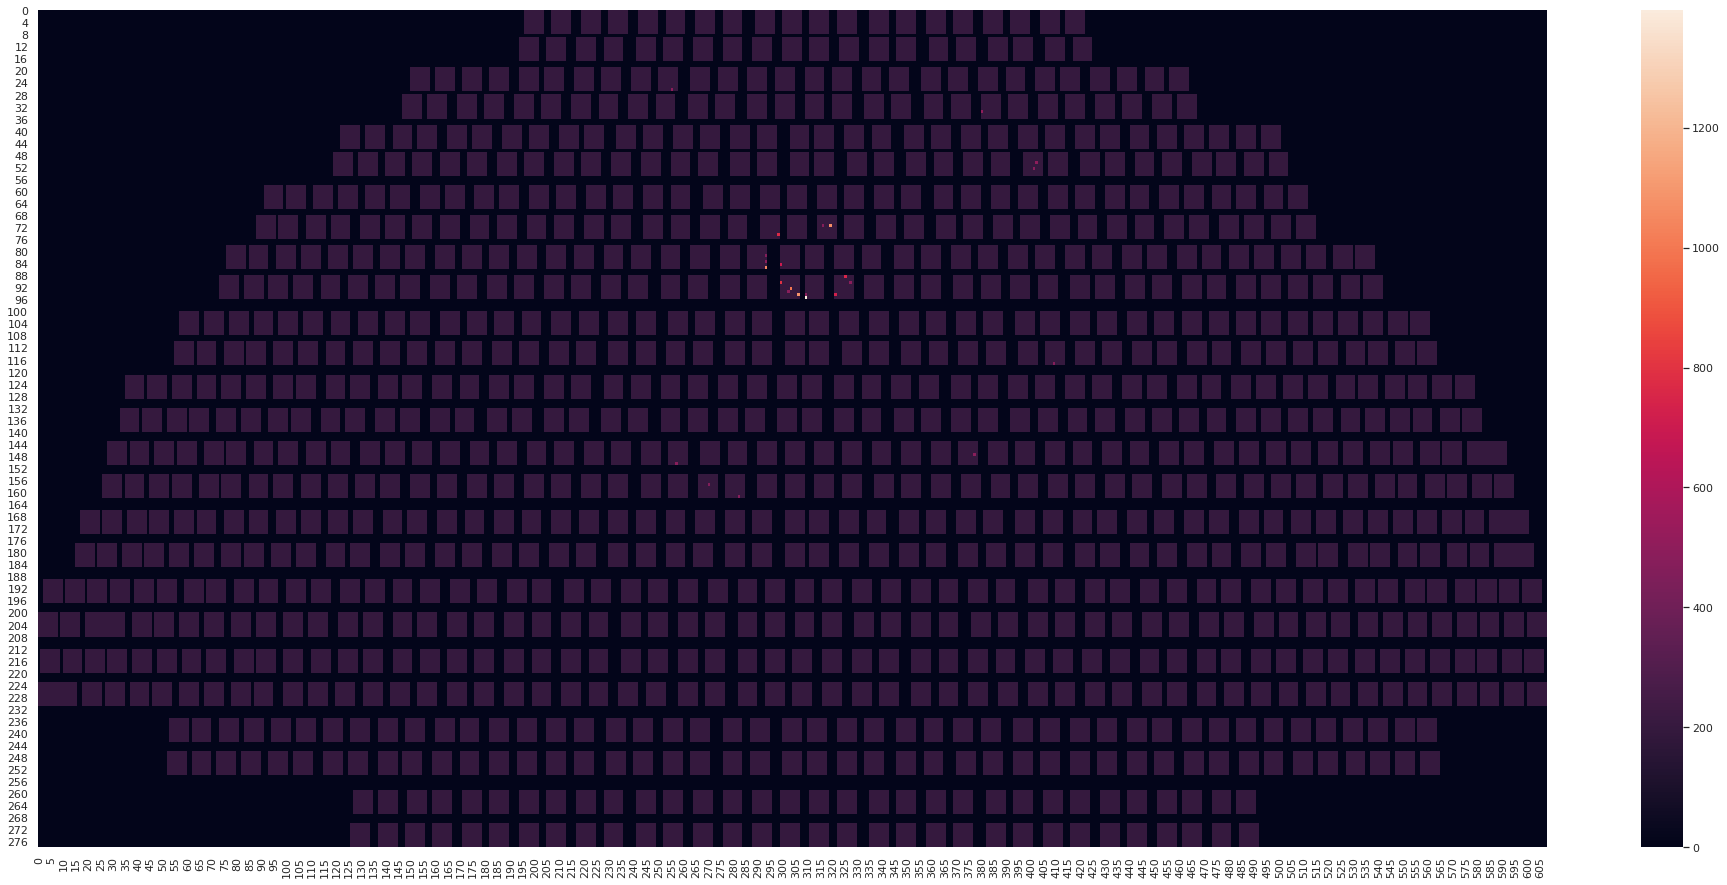

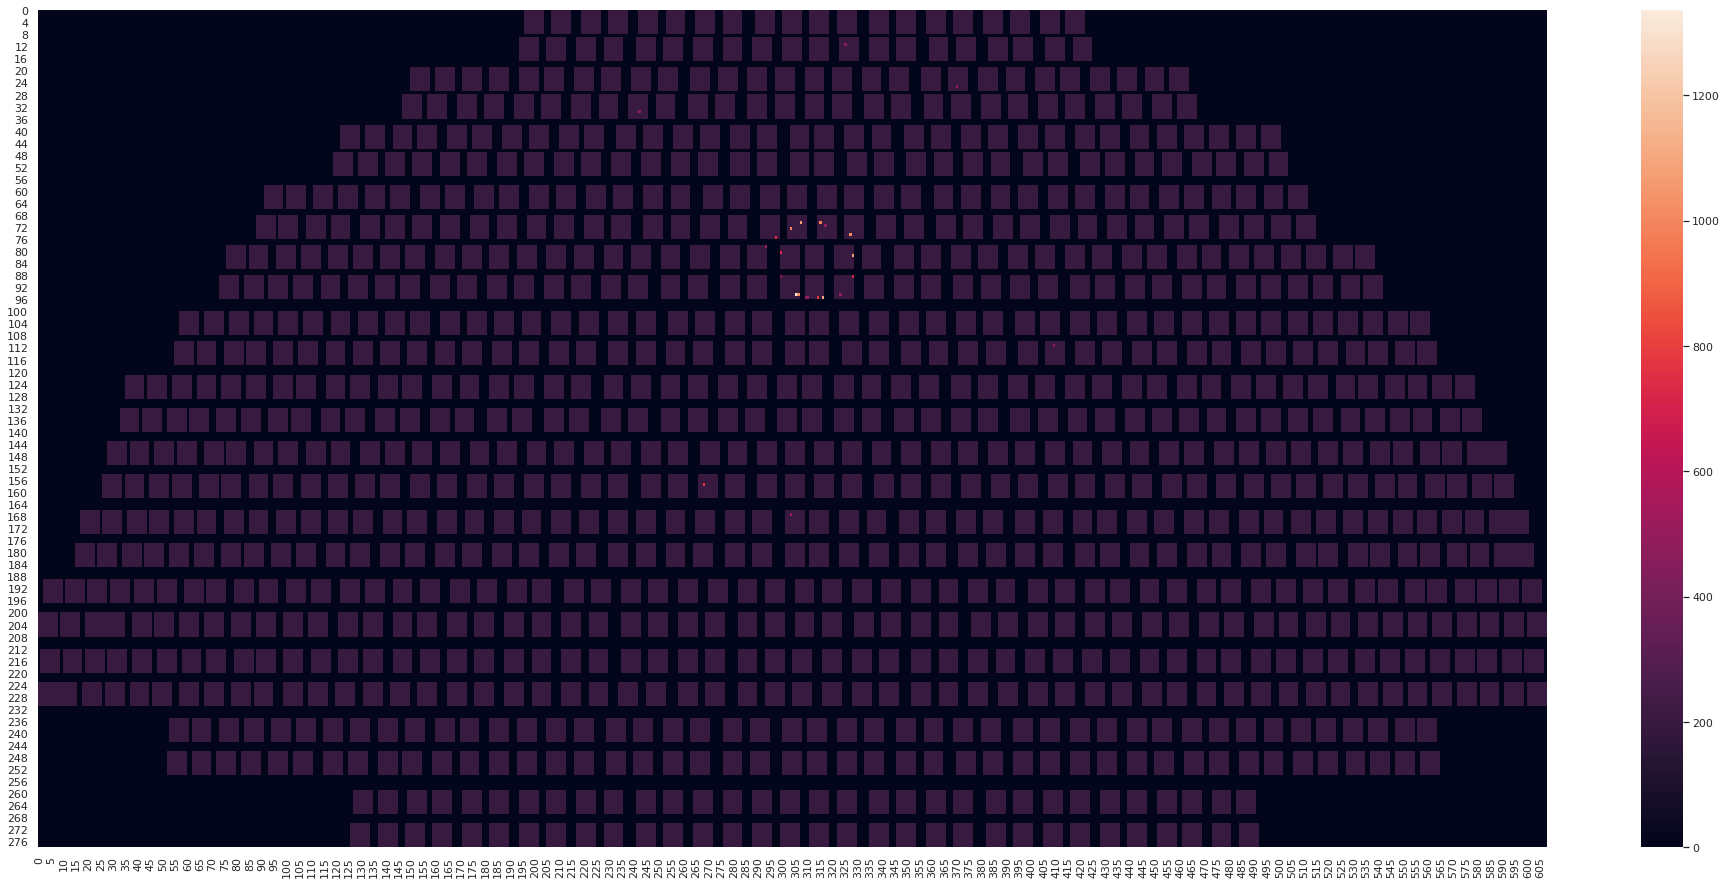

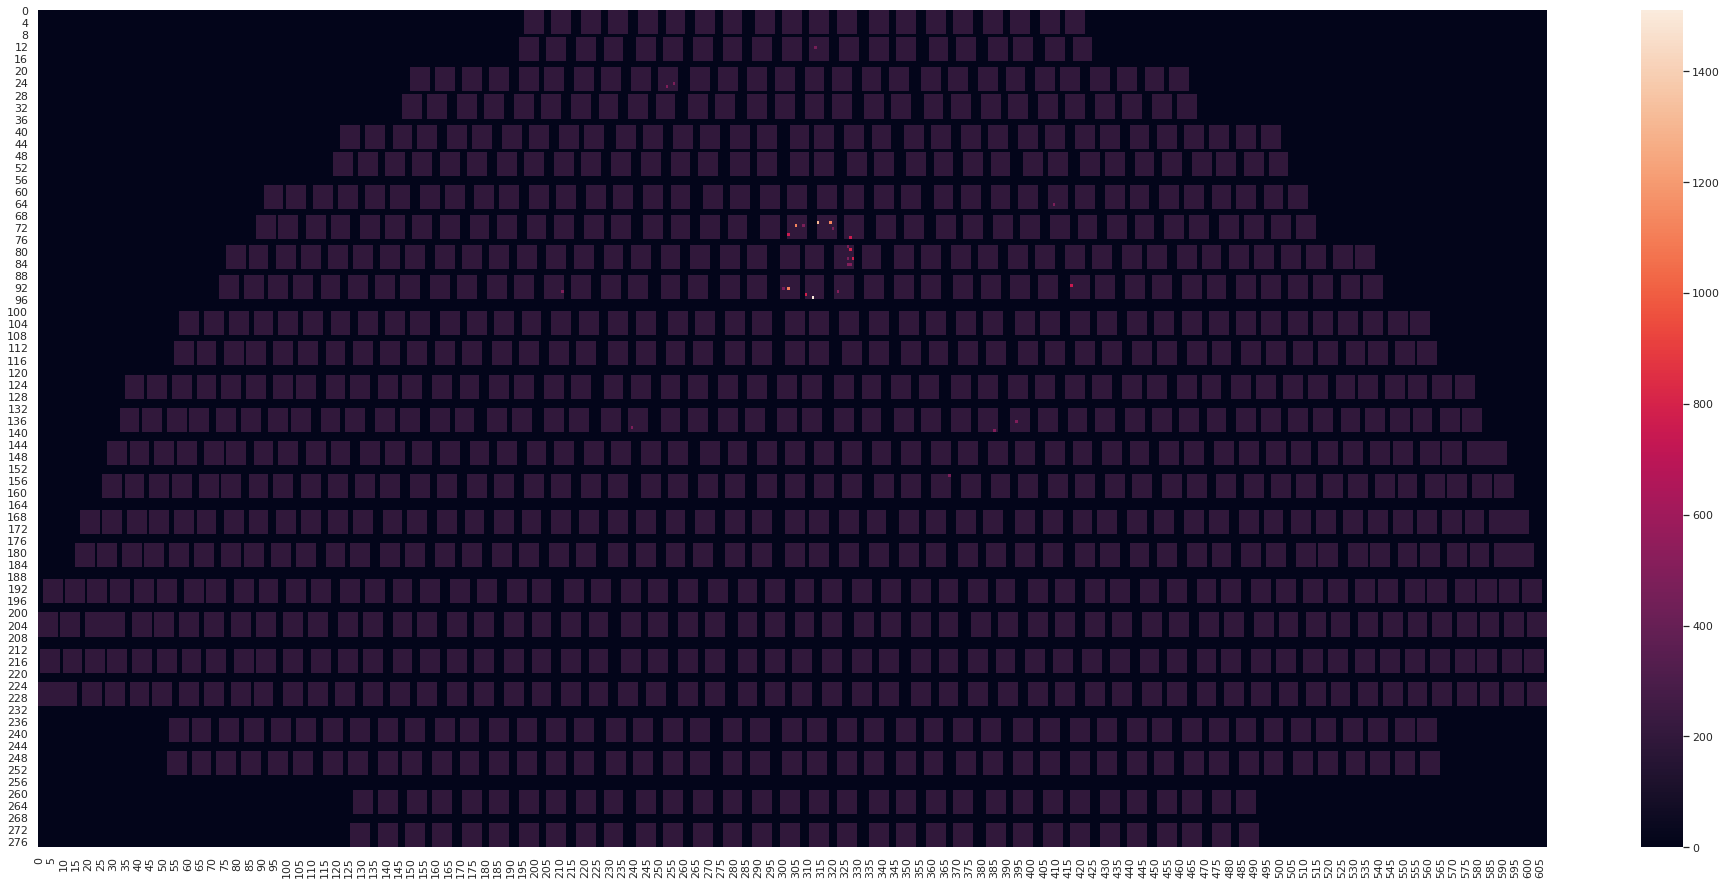

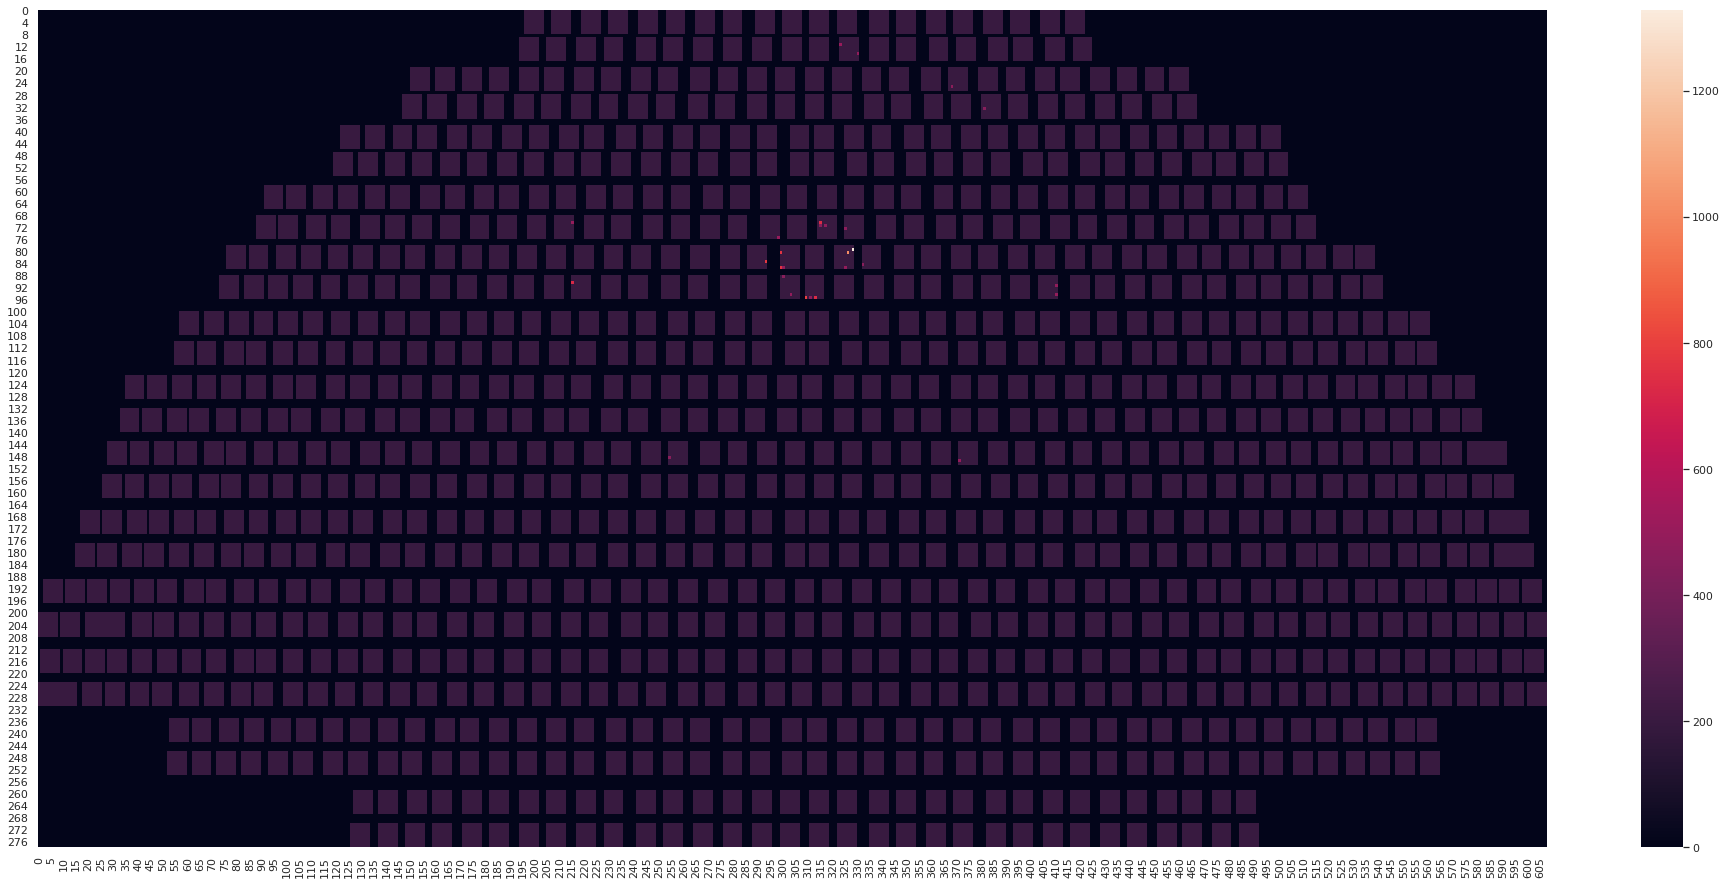

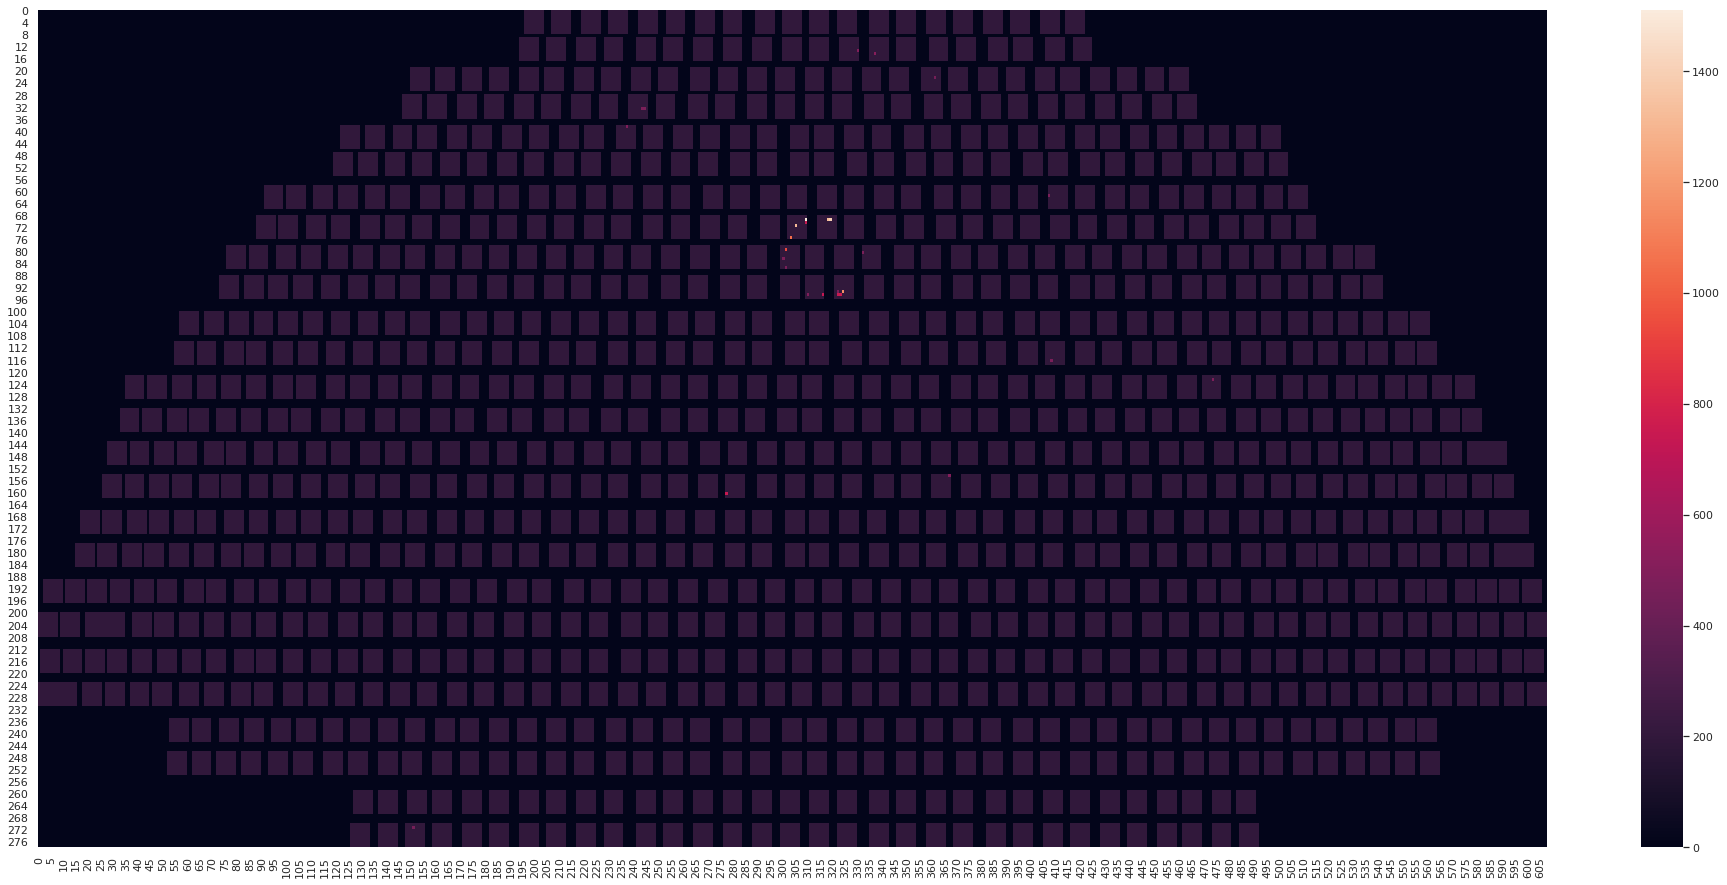

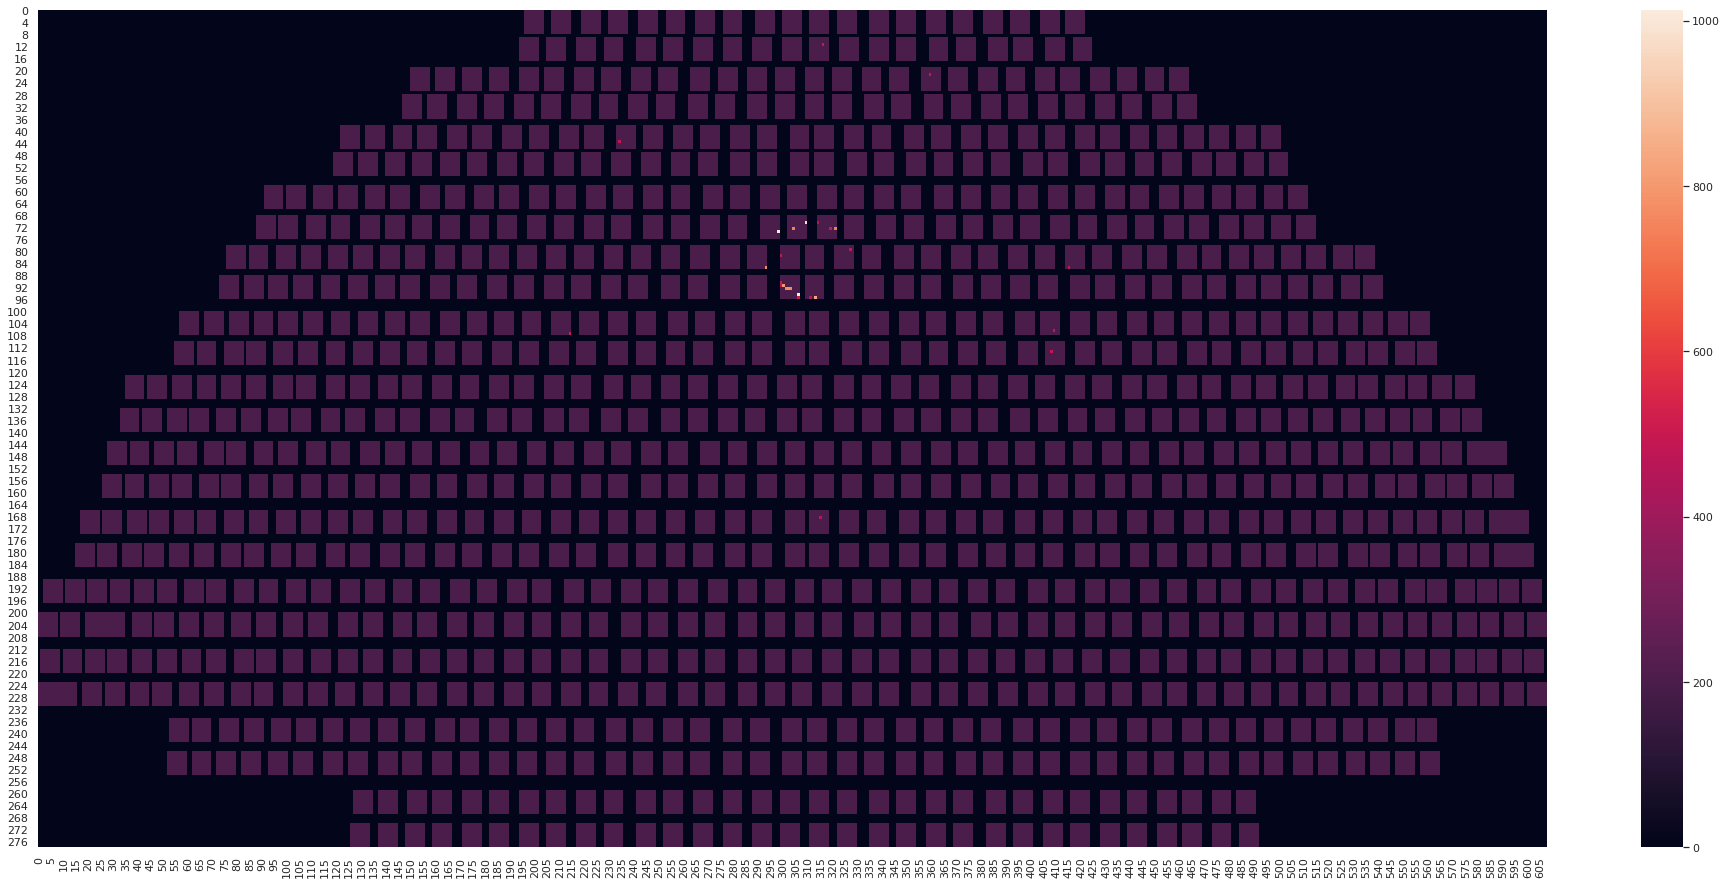

In [24]:
sns.set(rc={'figure.figsize': (33.8, 15.4)})

# For each event, copy the original matrix and fill with the
#     deposited charge in sector 0.
for ev_it in df_rec["event"].unique():
    df_rec_ev = df_rec[df_rec["event"] == ev_it].copy()
    matrix = matrix_base.copy()

    # Paint matrix with hits in sector 0.
    for idx, row in df_rec_ev.iterrows():
        if (row["sector"] != 0): continue
        matrix[row["x"]][row["y"]] += row["charge"]

    # Plot.
    sns.heatmap(matrix)
    plt.show()

    # Don't get carried away.
    if ev_it > 5: break